<a href="https://colab.research.google.com/github/santhosh1299/Tamil_news_classifier/blob/master/Tamil_model_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # for data manipulation and anaysis
import numpy as np #for parallel computation
import matplotlib.pyplot as plt  #visualization
import nltk 
import seaborn as sns
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import SpatialDropout1D
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential , load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.feature_selection import RFE
import re
import matplotlib
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data Exploration

In [ ]:
train = pd.read_csv('tamil_news_train.csv')
test = pd.read_csv('tamil_news_test.csv')

In [ ]:
train.head()

,NewsInEnglish,NewsInTamil,Category,CategoryInTamil
0,2017/May/19941-miss-iraq-competition-after-43-...,ஈராக்கில் 43 ஆண்டுகள் கழித்து அழகிப்போட்டி,world,உலகம்
1,2018/Dec/55921-viswasam-s-rustic-folk-song-has...,இந்திய அளவில் ட்ரெண்ட் ஆன அஜித்தின் ‘தள்லே தில...,cinema,சினிமா
2,2018/Dec/55929-inspector-who-bought-insurance-...,சொந்த செலவில் வாகன காப்பீடு எடுத்து கொடுத்த கா...,tamilnadu,தமிழ்நாடு
3,2017/Jan/16161-morarji-desai-budget.txt,பிறந்தநாளில் பட்ஜெட் தாக்கல் செய்தவர்,india,இந்தியா
4,2018/Jun/46476-i-have-not-joined-bjp-or-anyoth...,“நானா? பாஜகவில் இணைந்துவிட்டேனா” - வரலட்சுமி வ...,cinema,சினிமா


In [ ]:
train['NewsInTamil'][train['Category']=='sports']

17      உலகக் கோப்பை கால்பந்து: பெருவை வீழ்த்தி டென்மா...
31       அதற்காக வருத்தப்பட்டார் பொல்லார்ட்: ரோகித் சர்மா
35      ஐபிஎல்  : அணி மாறும் வீரர்கள், ஏலத்துக்கு முன்...
43      ஆறாவது முறை அவுட்: பெங்களூருக்குத் தொடரும் சோகம்!
57      மே.தீவுகளை மிரட்டிய இளமையும், அனுபவமும் - இந்த...
                              ...                        
3310    உலக குத்துச்சண்டை போட்டி: பட்டத்தை வென்றார் ஆண...
3332    ராஞ்சியில் சாதிக்கக் காத்திருக்கும் ஆஸ்திரேலிய...
3342    அமெரிக்க ஓபன் டென்னிஸ்:  ஆவது சுற்றில் ஃபெடரர்...
3352        இலங்கை கிரிக்கெட் வீரரின் தந்தை சுட்டுக்கொலை!
3357    ஜெய்தேவ் உனத்கட்டின் அதிரடியான ஹாட்ரிகால் புனே...
Name: NewsInTamil, Length: 1657, dtype: object

In [ ]:
train['NewsInTamil'][train['Category']=='tamilnadu']

2        சொந்த செலவில் வாகன காப்பீடு எடுத்து கொடுத்த கா...
8        தொடரும் பஸ் கட்டண உயர்வு: தினசரி, மாதாந்திர பா...
9        செம்மரம் வெட்டச் சென்றதாக திருப்பதியில் தமிழர்...
11       பஸ் ஸ்டிரைக்: மெட்ரோ ரயிலில் குவிந்த சென்னை மக...
12       ஜெயலலிதா நினைவிடத்தில் அஞ்சலி செலுத்தியவர் மார...
                               ...                        
14510    தேர்தல் வெற்றி: பிரதமருக்கு முதலமைச்சர் எடப்பா...
14514    இணைகிறதா அதிமுகவின் இரு அணிகளும்? - அமைச்சர்கள...
14517    புத்தாண்டு கொண்டாட்டம்: சென்னையில் 3,500 போலீச...
14518                 ‘இரும்புத்திரை’ பட பாணியில் திருட்டு
14520    துப்பாக்கிச் சூடு சம்பவம் நெஞ்சை உருக்குகிறது:...
Name: NewsInTamil, Length: 5028, dtype: object

In [ ]:
train['NewsInTamil'][train['Category']=='india']

3                    பிறந்தநாளில் பட்ஜெட் தாக்கல் செய்தவர்
5        இஸ்லாமிய மதபோதகர் ஜாகிர் நாயக் மீது 58 பக்க கு...
7                அடுத்த 50 ஆண்டுக்கு பாஜக ஆட்சி - அமித் ஷா
23       ‘பயங்கரவாதிகளின் தந்தை திலகர்’: 8ம் வகுப்பு பா...
27       சித்தாள் வேலை பார்க்கிறார் யோகாவில் தங்கம் வென...
                               ...                        
14501    அரசு பங்களாவை சேதப்படுத்திய அகிலேஷ் ! உ.பி.யில...
14509    வேறு சாதி ஆணை விரும்பியதால் இளம்பெண்ணை கட்டிவை...
14511    மக்களவை தேர்தலில் போட்டியிடப் போவதில்லை: சுஷ்ம...
14513    ஏப்ரல் மாதத்திற்குள் சம்பள நிலுவைத்தொகை வழங்கப...
14519       தங்க மங்கை பி.வி.சிந்துவின் சாதனைக் களங்கள் ! 
Name: NewsInTamil, Length: 3443, dtype: object

<AxesSubplot:ylabel='Category'>

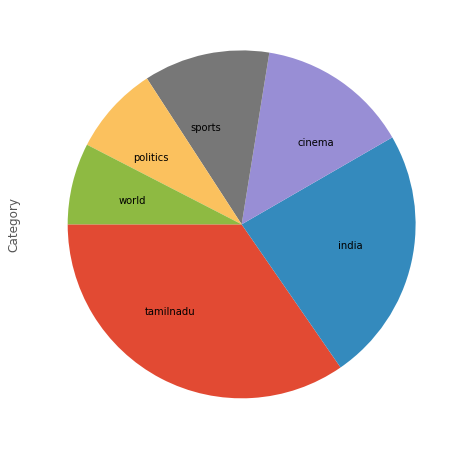

In [ ]:
train['Category'].value_counts().plot(kind='pie', labeldistance=0.567 ,rotatelabels =False, startangle=180,figsize=(16,8))

<AxesSubplot:>

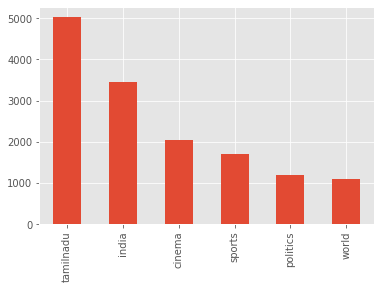

In [ ]:
train['Category'].value_counts().plot(kind='bar',)
plt.style.use('ggplot')
plt.show()

## Target values

In [ ]:
df.Category.unique()

array([1, 2, 3, 4, 5, 6, 'india', 'sports', 'tamilnadu', 'cinema',
       'politics', 'world'], dtype=object)

In [ ]:
df.Category = df.Category.replace('world', 1)
df.Category = df.Category.replace('cinema', 2)
df.Category = df.Category.replace('tamilnadu', 3)
df.Category = df.Category.replace('india', 4)
df.Category = df.Category.replace('politics', 5)
df.Category = df.Category.replace('sports', 6)


df.Category.head()

0    1
1    2
2    3
3    4
4    2
Name: Category, dtype: int64

## Removing Redudant values

In [ ]:
# fix random seed for reproducibility
np.random.seed(7)
train = train.drop_duplicates().reset_index(drop=True)
test = test.drop_duplicates().reset_index(drop=True)

## Preprocessing

In [ ]:
train.NewsInTamil = train.NewsInTamil.str.replace('\d+', ' ')

test.NewsInTamil = test.NewsInTamil.str.replace('\d+', ' ')

    
train = train.append(test)
df = train
df.head()
df.shape

,NewsInEnglish,NewsInTamil,Category,CategoryInTamil
0,2017/May/19941-miss-iraq-competition-after-43-...,ஈராக்கில் ஆண்டுகள் கழித்து அழகிப்போட்டி,world,உலகம்
1,2018/Dec/55921-viswasam-s-rustic-folk-song-has...,இந்திய அளவில் ட்ரெண்ட் ஆன அஜித்தின் ‘தள்லே தில...,cinema,சினிமா
2,2018/Dec/55929-inspector-who-bought-insurance-...,சொந்த செலவில் வாகன காப்பீடு எடுத்து கொடுத்த கா...,tamilnadu,தமிழ்நாடு
3,2017/Jan/16161-morarji-desai-budget.txt,பிறந்தநாளில் பட்ஜெட் தாக்கல் செய்தவர்,india,இந்தியா
4,2018/Jun/46476-i-have-not-joined-bjp-or-anyoth...,“நானா? பாஜகவில் இணைந்துவிட்டேனா” - வரலட்சுமி வ...,cinema,சினிமா


(13955, 4)

## Hyper Parameters

In [ ]:
# The maximum number of words to be used.
MAX_NB_WORDS = 32000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 120
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=False)
tokenizer.fit_on_texts(df.NewsInTamil.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 22904 unique tokens.


## Saving the Tokenizer

In [ ]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)



In [ ]:
X = tokenizer.texts_to_sequences(df.NewsInTamil.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (13955, 120)


In [ ]:
Y = pd.get_dummies(df.Category).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (13955, 6)


In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=.10)

## Training

In [ ]:

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_features, train_labels, epochs=5, batch_size=32,validation_split=0.2)


Epoch 1/5
314/314 [==============================] - 59s 189ms/step - loss: 1.3689 - accuracy: 0.4641 - val_loss: 0.9522 - val_accuracy: 0.6684
Epoch 2/5
314/314 [==============================] - 61s 194ms/step - loss: 0.5516 - accuracy: 0.8107 - val_loss: 0.8082 - val_accuracy: 0.7074
Epoch 3/5
314/314 [==============================] - 61s 196ms/step - loss: 0.1730 - accuracy: 0.9433 - val_loss: 0.9230 - val_accuracy: 0.7066
Epoch 4/5
314/314 [==============================] - 62s 196ms/step - loss: 0.0628 - accuracy: 0.9807 - val_loss: 1.0288 - val_accuracy: 0.7070
Epoch 5/5
314/314 [==============================] - 62s 199ms/step - loss: 0.0324 - accuracy: 0.9906 - val_loss: 1.1888 - val_accuracy: 0.7002


In [ ]:
def label_form(pred):
    for i in range(0,len(pred)):
        convert = pred[i]
        pred[i][np.argmax(pred[i])]=1
        for j in range(0,len(pred[i])):
            if pred[i][j]!=1:
                pred[i][j]=0
        
    return pred

In [ ]:
print(label_form(model_pred_test))

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]]


## Performance evaluation

In [ ]:

model_pred_train = model.predict(train_features)
model_pred_test = model.predict(test_features)
print('LSTM ' + str(roc_auc_score(train_labels, label_form(model_pred_train))))
print('LSTM Recurrent Neural Network: ' + str(roc_auc_score(test_labels, label_form(model_pred_test))))
print(classification_report(test_labels,model_pred_test))

LSTM 0.9709859118478588
LSTM Recurrent Neural Network: 0.8586630384022156
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       127
           1       0.90      0.78      0.84       249
           2       0.82      0.78      0.80       630
           3       0.71      0.81      0.76       410
           4       0.58      0.63      0.60       139
           5       0.91      0.88      0.89       184

   micro avg       0.78      0.78      0.78      1739
   macro avg       0.78      0.76      0.77      1739
weighted avg       0.79      0.78      0.78      1739
 samples avg       0.78      0.78      0.78      1739



In [ ]:
news = ['டெல்லி: மருத்துவ படிப்பில் ஓபிசி மாணவர்களுக்கு இவ்வாண்டு 50 சதவீத இடஒதுக்கீடு வழங்க உத்தரவிட முடியாது என்று சுப்ரீம் கோர்ட் இன்று தீர்ப்பு வழங்கியுள்ளது']
seq = tokenizer.texts_to_sequences(news)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['World', 'Cinema', 'TamilNadu', 'India', 'Politics', 'Sports']
label = pred, labels[np.argmax(pred)]
print("News Category is: ")
print(label[1])
seq = tokenizer.texts_to_sequences(news)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['world', 'cinema', 'tamilnadu', 'india', 'politics', 'sports']
label = pred, labels[np.argmax(pred)]
print("News Category is: ")
print(label[1])
print(pred)

News Category is: 
India
News Category is: 
india
[[7.8758430e-06 1.3518745e-06 1.9625016e-03 9.9802268e-01 5.2908345e-06
  4.1412966e-07]]


In [ ]:
model.save('news_model_local.h5')


In [ ]:
loaded_model = load_model('news_model_local.h5')
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=False)

In [ ]:
news = ['டெல்லி: மருத்துவ படிப்பில் ஓபிசி மாணவர்களுக்கு இவ்வாண்டு 50 சதவீத இடஒதுக்கீடு வழங்க உத்தரவிட முடியாது என்று சுப்ரீம் கோர்ட் இன்று தீர்ப்பு வழங்கியுள்ளதுி']
seq = tokenizerr.texts_to_sequences(news)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = loaded_model.predict(padded)
labels = ['World', 'Cinema', 'TamilNadu', 'India', 'Politics', 'Sports']
label = pred, labels[np.argmax(pred)]
print("News Category is: ")
print(label[1])

News Category is: 
Cinema
